<a href="https://colab.research.google.com/github/ishwor2048/borntocode/blob/master/Data_Scientist_Assessment_with_Tesla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# %%HTML 
# <script>
#     function luc21893_refresh_cell(cell) {
#         if( cell.luc21893 ) return;
#         cell.luc21893 = true;
#         console.debug('New code cell found...' );
        
#         var div = document.createElement('DIV');            
#         cell.parentNode.insertBefore( div, cell.nextSibling );
#         div.style.textAlign = 'right';
#         var a = document.createElement('A');
#         div.appendChild(a);
#         a.href='#'
#         a.luc21893 = cell;
#         a.setAttribute( 'onclick', "luc21893_toggle(this); return false;" );

#         cell.style.visibility='hidden';
#         cell.style.position='absolute';
#         a.innerHTML = '[show code]';        
                
#     }
#     function luc21893_refresh() {                
#         if( document.querySelector('.code_cell .input') == null ) {            
#             // it apeears that I am in a exported html
#             // hide this code
#             var codeCells = document.querySelectorAll('.jp-InputArea')
#             codeCells[0].style.visibility = 'hidden';
#             codeCells[0].style.position = 'absolute';                        
#             for( var i = 1; i < codeCells.length; i++ ) {
#                 luc21893_refresh_cell(codeCells[i].parentNode)
#             }
#             window.onload = luc21893_refresh;
#         }                 
#         else {
#             // it apperas that I am in a jupyter editor
#             var codeCells = document.querySelectorAll('.code_cell .input')
#             for( var i = 0; i < codeCells.length; i++ ) {
#                 luc21893_refresh_cell(codeCells[i])
#             }            
#             window.setTimeout( luc21893_refresh, 1000 )
#         }        
#     }
    
#     function luc21893_toggle(a) {
#         if( a.luc21893.style.visibility=='hidden' ) {
#             a.luc21893.style.visibility='visible';        
#             a.luc21893.style.position='';
#             a.innerHTML = '[hide code]';
#         }
#         else {
#             a.luc21893.style.visibility='hidden';        
#             a.luc21893.style.position='absolute';
#             a.innerHTML = '[show code]';
#         }
#     }
    
#     luc21893_refresh()
# </script>

<center><img src="https://wallpaperaccess.com/full/486516.jpg"/ width=750 height=750></center>

<h1><b><center>TESLA DATA SCIENTIST ASSESSMENT

<h3><b><center>Assessment on Potting

<b>Recruiter (Tesla)</b>: Karissa Thein<br>
<b>Staff Data Scientist (Tesla)</b>: Brandon Perera<br>
<b>Candidate</b>: Ishwor Bhusal<br>

<h3><b>Problem Statement</b></h3>
<ul><li>Unexpected shift in thickness occurred on 11/27 causing excursion of out of spec parts
<li>Due to delay between measurement and potting time, large volume of material out of spec</ul>

<b>Explore the data provided to answer the following questions:</b>
<ol><li>Does the data suggest that the uptick in thickness is due to a change with the material or a machine?</li>
<li>Are there any signals from the Dispense data that could be used to predict the shift in density measured from density check data?</li>
<li>Are there any signals from the Dispense/Density data that could be used to predict the shift in thickness sooner? (i.e. stop machine sooner, not having to wait cure time for thickness measurement)</li></ol>

<b>Show all exploratory analysis/work</b>
<ul><li>Thought process</li>
<li>Statistical analysis and plots</li>
<li>Code used to summarize, analyze, and plot data</li></ul>

<b><u>Tip:</u></b> Tell a story with the analysis and show your work as you go (jupyter notebook, markdown, or powerpoint preferred)

<h3><b><u>Data Visualization

<b>Using the data provided, create a dashboard to monitor this process using Tableau, Python, or R. (limit to 1-2 pages limited to 1600x900 resolution)</b><br>
<ol><li>key plots to see thickness performance
<li>key plots to identify issues with dispense machines/system
<li>Any other useful insights</ol>
<br>
<b><u>Share your tableau workbook or code used to generate dashboard.

In [ ]:
import numpy as np # perform a number of mathematical operations on arrays such as trigonometric, statistical, and algebraic routines
import pandas as pd # data structures and operations for manipulating numerical tables and time series
import matplotlib.pyplot as plt # creating static, animated, and interactive visualizations in Python
import seaborn as sns # making statistical graphics in Python
import re, os, sys, time, warnings 
from pprint import pprint
import cufflinks as cf

import plotly.graph_objects as go
import chart_studio.plotly as py
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

# OS: creating and removing a directory (folder), fetching its contents, changing and identifying the current directory, 
# RE: specifies a set of strings that matches it
# SYS: provides various functions and variables that are used to manipulate different parts of the Python runtime environment.
# TIME: provides many ways of representing time in code, such as objects, numbers, and strings.
# WARNINGS: a way to warn programmers about changes in language or library features in anticipation of backwards incompatible changes coming with Python 3.0
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
from jupyterthemes import get_themes
from jupyterthemes import jtplot

from IPython.core.display import display, HTML
from IPython.display import Image
from IPython.core.interactiveshell import InteractiveShell
#set_nb_theme('gruvboxd')

# Setting up display options and Notebook view
pd.set_option('display.max_columns', None)     # Make sure we can see all of the columns
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
InteractiveShell.ast_node_interactivity = "all"
display(HTML("<style>.container { width:80% !important;}</style>")) # To make the Jupyter Interface much larger for flexibility

warnings.filterwarnings('ignore', module = "matplotlib\..*")

%matplotlib inline

<h3><b>Import the Datasets:</b></h3>
    <ol><li>Density Dataset
        <li>Thickness Dataset</ol>

In [ ]:
df_density = pd.read_csv("Potting Problem Density Dataset.csv") # Importing Density Data using Pandas
df_thickness = pd.read_csv("Potting Problem Thickness Dataset.csv") # Importing Thickness Data using Pandas

print("Here are top 5 rows of Density Dataset:")
df_density.head()
print("Here are top 5 rows of Thickness Dataset: ")
df_thickness.head()

Here are top 5 rows of Density Dataset:


,Measurement Time,Potting Machine,Density_Average,Ambient_Temperature,Dispense Flow Rate
0,2021-12-01T07:21:55,V5_1,0.202489,21.8,64.1
1,2021-12-01T06:57:25,V5_1,0.196310,22.1,64.1
2,2021-12-01T05:23:04,V5_1,0.207440,22.0,64.1
3,2021-12-01T04:36:36,V5_1,0.205935,22.0,64.1
4,2021-12-01T03:20:31,V5_1,0.201927,22.5,63.0


Here are top 5 rows of Thickness Dataset: 


,potting_time_pst,measurement_time_pst,Part Serial,Potting Machine,Dispense End Timestamp (Potting),Dispense Start Timestamp (Potting),IR module temp,Dispense Duration Norm,Part A Batch,Part A Pressure - Avg,Part A Pressure - Max,Part A Pressure - Min,Combined Volume Norm,Part A + Part B Flow Rate - Avg,Part A + Part B Flow Rate - Max,Part A + Part B Flow Rate - Min,Part B Batch,Part B Pressure - Avg,Part B Pressure - Max,Part B Pressure - Min,Potting Ratio (Part A/Part B) - Avg,Potting Ratio (Part A/Part B) - Max,Potting Ratio (Part A/Part B) - Min,Target Part A+Part B Flow Rate,Time From Last Dispense,Part B Viscocity,Part B temp,Lid,Thickness_Avg_Norm,Thickness Max Norm,Thickness Min Norm
0,2021/11/17 4:49:26 AM,2021/11/17 9:23:48 AM,V4_0,V5_0,2021/11/17 12:56:01 PM,2021/11/17 12:55:06 PM,30.274361,5.1147,V9_0,991.533936,1058,0,349.20000,71.224869,74.800003,68.500000,V17_0,1007.053040,1056,912,96.752777,100,95,72.199997,14.728000,NaN,NaN,V35_0,0.644310,0.815563,0.415865
1,2021/11/21 8:28:32 PM,2021/11/22 2:22:05 AM,V4_4,V5_0,2021/11/22 4:35:45 AM,2021/11/22 4:34:50 AM,28.794214,5.1134,V9_0,856.163879,902,729,339.28999,68.840698,73.099998,66.400002,V17_1,960.137085,1008,889,97.061890,99,95,70.000000,18.191999,NaN,NaN,V35_4,0.519785,0.717764,0.345994
2,2021/11/19 11:28:29 PM,2021/11/20 2:45:33 AM,V4_5,V5_1,2021/11/20 7:34:59 AM,2021/11/20 7:34:04 AM,22.415844,5.1153,V9_0,957.085144,1090,897,347.33999,70.508186,74.199997,67.500000,V17_0,1021.344971,1185,0,98.969269,100,97,71.099998,527.536011,3811.060059,24.042480,V35_5,0.537020,0.724209,0.303849
3,2021/11/27 1:14:34 AM,2021/11/27 5:22:05 AM,V4_6,V5_1,2021/11/27 9:22:06 AM,2021/11/27 9:21:12 AM,20.935698,5.1169,V9_0,846.153564,901,774,351.91001,72.254250,76.500000,69.300003,V17_0,948.671509,1091,0,98.521355,99,97,73.099998,18.792000,3613.940918,24.707785,V35_6,0.565502,0.777851,0.276499
4,2021/11/24 3:55:45 PM,2021/11/26 10:29:59 AM,V4_8,V5_1,2021/11/25 12:02:52 AM,2021/11/25 12:01:57 AM,20.462660,5.1144,V9_0,801.866089,853,723,345.75000,70.798309,74.599998,68.400002,V17_1,1008.620239,1175,843,98.161491,100,87,72.000000,29.431999,3718.130859,24.707785,V35_8,0.589840,0.759843,0.441745


Looking basic Statistical measures using DataFrame's describe functionality

In [ ]:
print("Here is the basic Statistics of Density Dataset:")
df_density.describe()
print("Here is the basic Statistics of Thickness Dataset:")
df_thickness.describe()

Here is the basic Statistics of Density Dataset:


,Density_Average,Ambient_Temperature,Dispense Flow Rate
count,518.000000,518.000000,518.000000
mean,0.247500,22.575714,70.324903
std,0.023741,4.091348,3.344457
min,0.153811,20.500000,22.300000
25%,0.233346,21.800000,70.000000
50%,0.248180,22.200000,71.000000
75%,0.263870,22.800000,71.100000
max,0.327282,100.000000,99.000000


Here is the basic Statistics of Thickness Dataset:


,IR module temp,Dispense Duration Norm,Part A Pressure - Avg,Part A Pressure - Max,Part A Pressure - Min,Combined Volume Norm,Part A + Part B Flow Rate - Avg,Part A + Part B Flow Rate - Max,Part A + Part B Flow Rate - Min,Part B Pressure - Avg,Part B Pressure - Max,Part B Pressure - Min,Potting Ratio (Part A/Part B) - Avg,Potting Ratio (Part A/Part B) - Max,Potting Ratio (Part A/Part B) - Min,Target Part A+Part B Flow Rate,Time From Last Dispense,Part B Viscocity,Part B temp,Thickness_Avg_Norm,Thickness Max Norm,Thickness Min Norm
count,19714.000000,19714.000000,19714.000000,19714.000000,19714.000000,19714.000000,19714.000000,19714.000000,19714.000000,19714.000000,19714.000000,19714.000000,19714.000000,19714.000000,19714.000000,19714.000000,19714.000000,10228.000000,10228.000000,19714.000000,19714.000000,19714.000000
mean,24.564946,5.115724,908.220088,990.718373,578.924115,342.540801,69.635132,73.122000,67.008745,983.324568,1070.299787,593.591204,97.994202,100.238359,95.028812,70.468397,72.261483,3632.644563,24.666015,0.591828,0.810444,0.324825
std,3.731468,0.056948,80.021679,93.344177,392.722519,10.314464,1.905651,2.073040,2.024354,69.141614,80.170582,421.849530,0.918305,2.496250,8.215042,1.991958,93.614318,218.011459,0.693243,0.111682,0.154962,0.100614
min,15.900145,0.315100,590.145264,635.000000,0.000000,20.489999,56.026501,58.700001,0.000000,637.923096,715.000000,0.000000,96.079735,97.000000,0.000000,57.000000,0.280000,3046.205078,21.720024,0.270834,0.000000,-0.011952
25%,21.454514,5.114500,874.616043,949.000000,0.000000,339.460010,69.076374,72.500000,66.400002,940.987976,1019.000000,0.000000,97.104391,99.000000,95.000000,70.000000,19.256001,3477.843384,24.240852,0.519163,0.706396,0.265442
50%,23.300882,5.116100,917.349884,996.000000,795.000000,343.560010,69.778580,73.300003,67.400002,987.150360,1067.000000,823.000000,98.277527,100.000000,96.000000,71.000000,32.271999,3641.315918,24.649801,0.577666,0.791327,0.329370
75%,28.397472,5.118200,953.361831,1038.000000,874.000000,348.000000,70.579002,74.099998,67.900002,1025.336639,1118.000000,927.000000,98.824125,101.000000,97.000000,71.099998,82.881999,3774.803955,25.107578,0.643854,0.889130,0.386704
max,33.310955,5.300700,1425.463623,1665.000000,1332.000000,371.310010,73.986443,77.699997,71.300003,1348.045532,1576.000000,1257.000000,100.346855,213.000000,99.000000,74.199997,599.112000,4710.776367,26.480909,1.336248,1.762853,0.867739


<h3><b>A quick Data Cleansing

Converting Pandas Core Series Datetime columns to Pandas Datetime columns

In [ ]:
df_density['Measurement Time'] = pd.to_datetime(df_density['Measurement Time'])
df_thickness['potting_time_pst'] = pd.to_datetime(df_thickness['potting_time_pst'])
df_thickness['measurement_time_pst'] = pd.to_datetime(df_thickness['measurement_time_pst'])
df_thickness['Dispense End Timestamp (Potting)'] = pd.to_datetime(df_thickness['Dispense End Timestamp (Potting)'])
df_thickness['Dispense Start Timestamp (Potting)'] = pd.to_datetime(df_thickness['Dispense Start Timestamp (Potting)'])

df_density['Measurement Time'].head()
df_thickness['potting_time_pst'].head()
df_thickness['measurement_time_pst'].head()
df_thickness['Dispense End Timestamp (Potting)'].head()
df_thickness['Dispense Start Timestamp (Potting)'].head()

0   2021-12-01 07:21:55
1   2021-12-01 06:57:25
2   2021-12-01 05:23:04
3   2021-12-01 04:36:36
4   2021-12-01 03:20:31
Name: Measurement Time, dtype: datetime64[ns]

0   2021-11-17 04:49:26
1   2021-11-21 20:28:32
2   2021-11-19 23:28:29
3   2021-11-27 01:14:34
4   2021-11-24 15:55:45
Name: potting_time_pst, dtype: datetime64[ns]

0   2021-11-17 09:23:48
1   2021-11-22 02:22:05
2   2021-11-20 02:45:33
3   2021-11-27 05:22:05
4   2021-11-26 10:29:59
Name: measurement_time_pst, dtype: datetime64[ns]

0   2021-11-17 12:56:01
1   2021-11-22 04:35:45
2   2021-11-20 07:34:59
3   2021-11-27 09:22:06
4   2021-11-25 00:02:52
Name: Dispense End Timestamp (Potting), dtype: datetime64[ns]

0   2021-11-17 12:55:06
1   2021-11-22 04:34:50
2   2021-11-20 07:34:04
3   2021-11-27 09:21:12
4   2021-11-25 00:01:57
Name: Dispense Start Timestamp (Potting), dtype: datetime64[ns]

**Checking data types for the Density Data to be sure that we have right data types**

In [ ]:
df_density.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Measurement Time     518 non-null    datetime64[ns]
 1   Potting Machine      518 non-null    object        
 2   Density_Average      518 non-null    float64       
 3   Ambient_Temperature  518 non-null    float64       
 4   Dispense Flow Rate   518 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 20.4+ KB


**Checking data types for the Thickness Data to be sure that we have right data types**

In [ ]:
df_thickness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19714 entries, 0 to 19713
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   potting_time_pst                     19714 non-null  datetime64[ns]
 1   measurement_time_pst                 19714 non-null  datetime64[ns]
 2   Part Serial                          19714 non-null  object        
 3   Potting Machine                      19714 non-null  object        
 4   Dispense End Timestamp (Potting)     19713 non-null  datetime64[ns]
 5   Dispense Start Timestamp (Potting)   19713 non-null  datetime64[ns]
 6   IR module temp                       19714 non-null  float64       
 7   Dispense Duration Norm               19714 non-null  float64       
 8   Part A Batch                         19714 non-null  object        
 9   Part A Pressure - Avg                19714 non-null  float64       
 10  Part A Pre

**Checking if there are any null values in the data**

In [ ]:
print("Checking Null values in the Density Data: ")
df_density.isnull().sum()
print("\n")
print("Checking Null values in the Thickness Data: ")
df_thickness.isnull().sum()

Checking Null values in the Density Data: 


Measurement Time       0
Potting Machine        0
Density_Average        0
Ambient_Temperature    0
Dispense Flow Rate     0
dtype: int64



Checking Null values in the Thickness Data: 


potting_time_pst                          0
measurement_time_pst                      0
Part Serial                               0
Potting Machine                           0
Dispense End Timestamp (Potting)          1
Dispense Start Timestamp (Potting)        1
IR module temp                            0
Dispense Duration Norm                    0
Part A Batch                              0
Part A Pressure - Avg                     0
Part A Pressure - Max                     0
Part A Pressure - Min                     0
Combined Volume Norm                      0
Part A + Part B Flow Rate - Avg           0
Part A + Part B Flow Rate - Max           0
Part A + Part B Flow Rate - Min           0
Part B Batch                              0
Part B Pressure - Avg                     0
Part B Pressure - Max                     0
Part B Pressure - Min                     0
Potting Ratio (Part A/Part B) - Avg       0
Potting Ratio (Part A/Part B) - Max       0
Potting Ratio (Part A/Part B) - 

<h2><b>Data Exploration with Simple Visualization to Identify the cause of the Problem

Since the data is on time-series format, most the of the data points are align to specific date and time, I will use line-chart for the analysis since that is the most relevant thing to do for this dataset which is very helpful to identify the problem.

<h4><b>As the data is focused towards monitoring various processes of Potting, I will focus more on Time-Series Analysis and looking at performance at each point of time

1. Look at the thickness performance over time to identify if the concern has occured before and if there is any trend of issue associated with thickness.
2. Look at various determining factors, such as Pressure Flow, Volume of Material, Density of Material, IR Temperature by each Tank.
3. Look comparatively which Tank has played Key role on mixture (either V5_0 or V5_1)
4. Record result log and identify the potential factor
5. Helpful tip to prevent future manufacturing distruptions.

<h3><b>Looking at the Potting Thickness Performance over time

(array([738103., 738107., 738111., 738115., 738119., 738123., 738125.]),
 <a list of 7 Text major ticklabel objects>)

Text(0.5, 0, 'Dispense Start Timestamp (Potting)')

Text(0, 0.5, 'Average Thickness of the Material')

Text(0.5, 1.0, 'Average Thickness of the Materials from both Part A & B Tanks during each of Dispense Start Time')

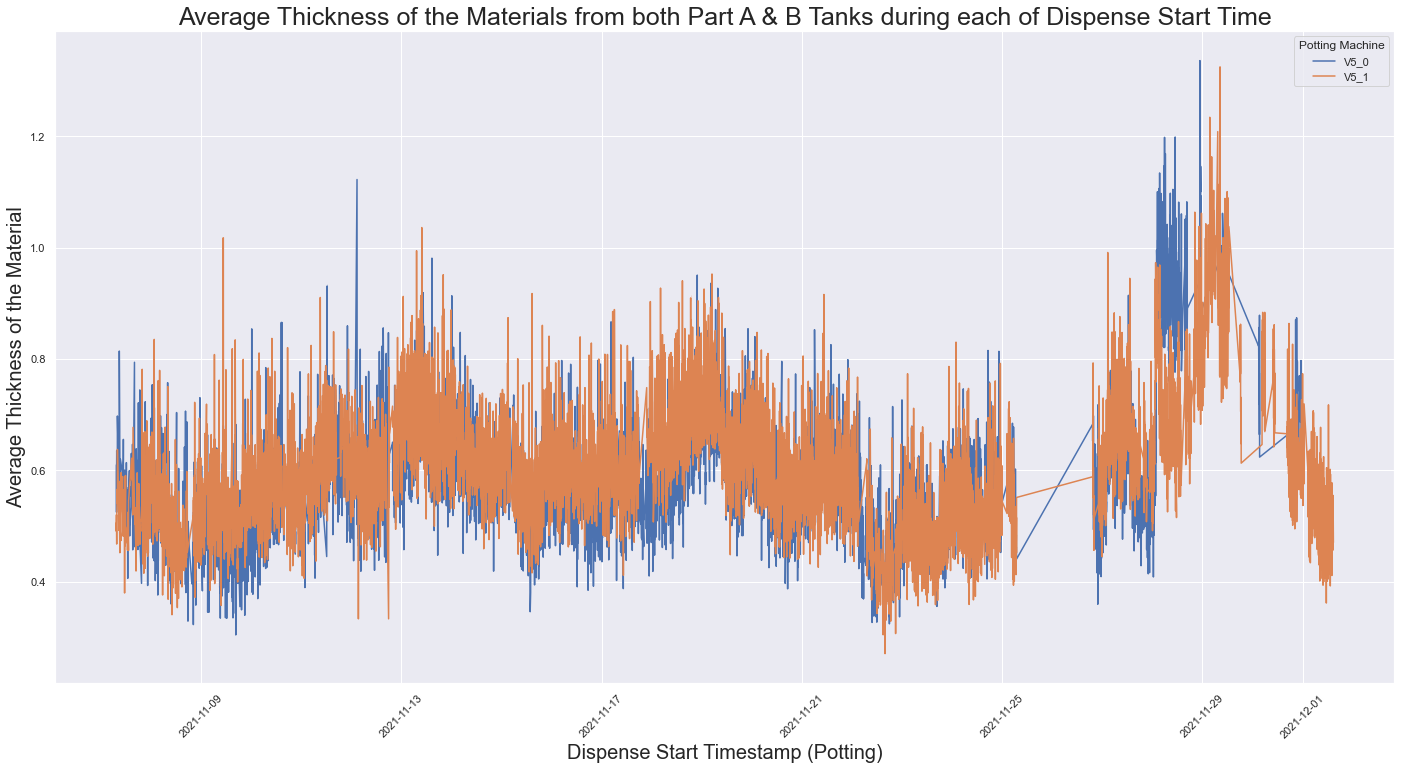

In [ ]:
sns.set(rc={'figure.figsize':(24,12)})
sns.lineplot(x ='Dispense Start Timestamp (Potting)', y = 'Thickness_Avg_Norm', data = df_thickness, hue='Potting Machine')
plt.xticks(rotation=45)
plt.xlabel("Dispense Start Timestamp (Potting)", fontsize=20)
plt.ylabel("Average Thickness of the Material", fontsize=20)
plt.title("Average Thickness of the Materials from both Part A & B Tanks during each of Dispense Start Time", fontsize=25)
plt.show()

<b>Quick finding:</b> Material from V5_0 Part Tank has the higher average thickness comparing to material from V5_1 at the time of issue.

(array([738103., 738107., 738111., 738115., 738119., 738123., 738125.]),
 <a list of 7 Text major ticklabel objects>)

Text(0.5, 0, 'Dispense End Timestamp (Potting)')

Text(0, 0.5, 'Average Thickness of the Material')

Text(0.5, 1.0, 'Average Thickness of the Materials from both Part A & B Tanks during each of Dispense End Time')

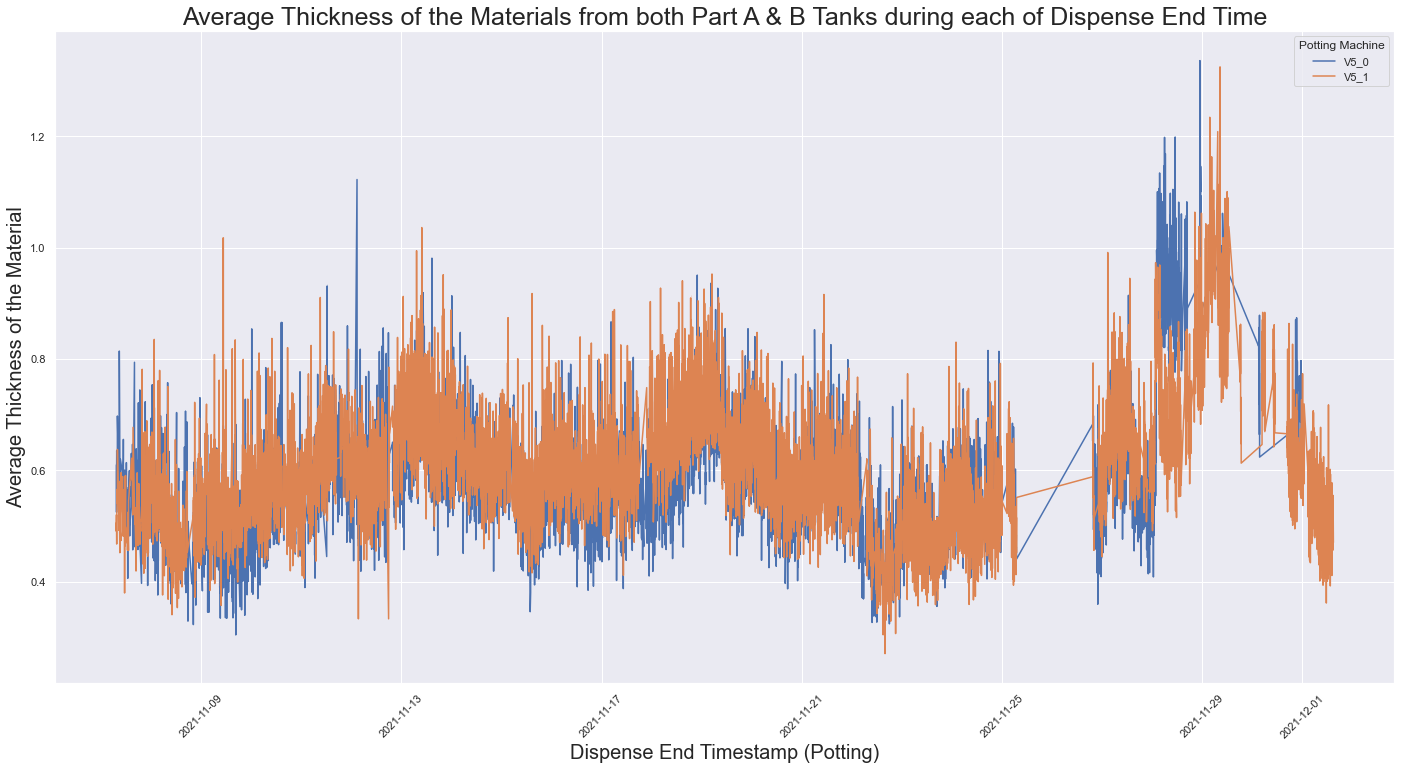

In [ ]:
sns.set(rc={'figure.figsize':(24,12)})
sns.lineplot(x ='Dispense End Timestamp (Potting)', y = 'Thickness_Avg_Norm', data = df_thickness, hue='Potting Machine')
plt.xticks(rotation=45)
plt.xlabel("Dispense End Timestamp (Potting)", fontsize=20)
plt.ylabel("Average Thickness of the Material", fontsize=20)
plt.title("Average Thickness of the Materials from both Part A & B Tanks during each of Dispense End Time", fontsize=25)
plt.show()

(array([738103., 738107., 738111., 738115., 738119., 738123., 738125.]),
 <a list of 7 Text major ticklabel objects>)

Text(0.5, 0, 'Date-Time of Thickness Measure')

Text(0, 0.5, 'Minimum Thickness (Normalized)')

Text(0.5, 1.0, 'Minimum Thickness of the Potting at each end of Dispense of Material')

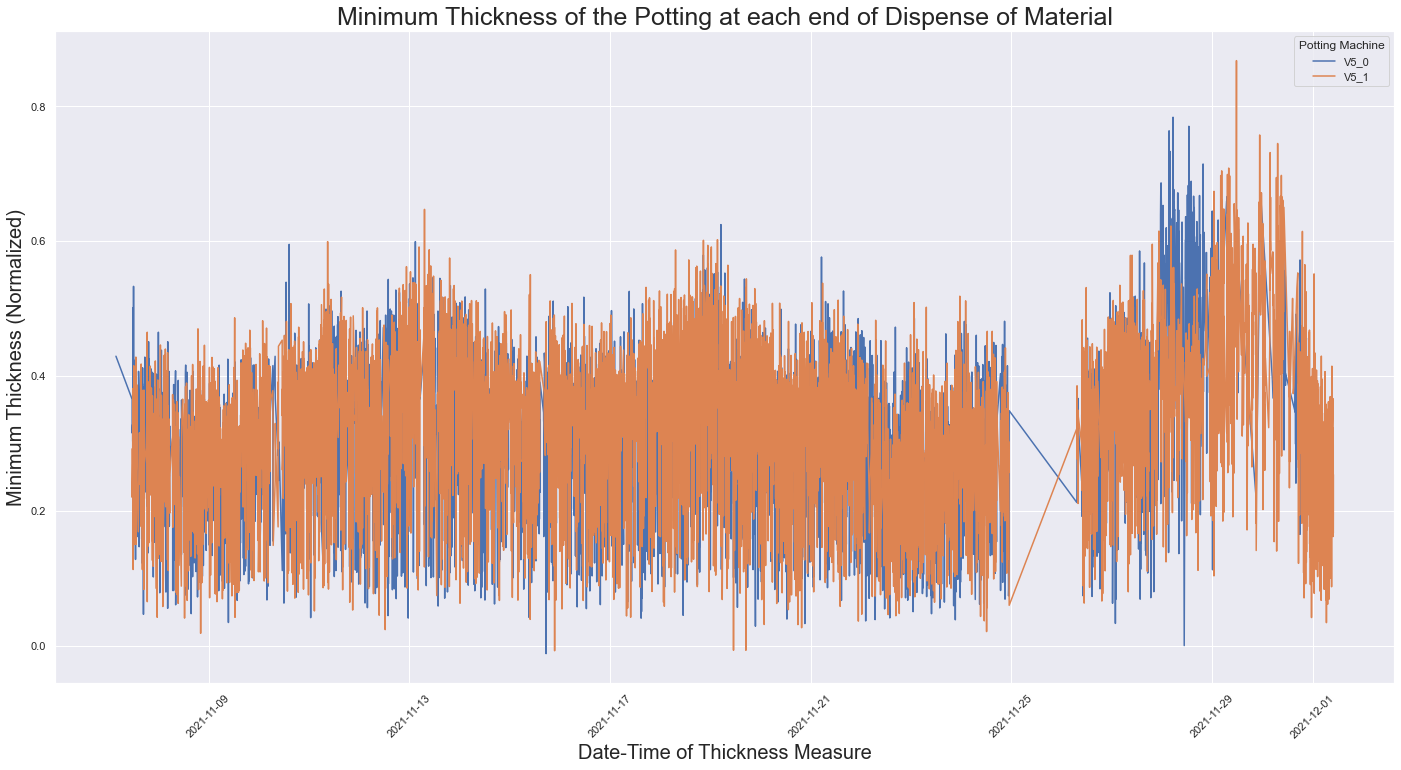

In [ ]:
sns.set(rc={'figure.figsize':(24,12)})
sns.lineplot(x ='measurement_time_pst', y = 'Thickness Min Norm', data = df_thickness, hue='Potting Machine')
plt.xticks(rotation=45)
plt.xlabel("Date-Time of Thickness Measure", fontsize=20)
plt.ylabel("Minimum Thickness (Normalized)", fontsize=20)
plt.title("Minimum Thickness of the Potting at each end of Dispense of Material", fontsize=25)
plt.show()

<b>Key findings from the Thickness Performance:</b><br>
Thickness is nearly consistent throughout the potting thickness measure except there is slight rise of thickness from V5_0 Part Tank which is the major concern. 

<b>Looking at the Average Pressure Meter records by each Part Tank for every point of time. This will help us to understand if Material flow pressure is the cause of the problem. 
    

(array([738103., 738107., 738111., 738115., 738119., 738123., 738125.]),
 <a list of 7 Text major ticklabel objects>)

Text(0.5, 0, 'Measurement Date')

Text(0, 0.5, 'Average Pressure from Part A Tank')

Text(0.5, 1.0, 'Average Pressure Meters Records from Part A Tank by Each Potting Machine')

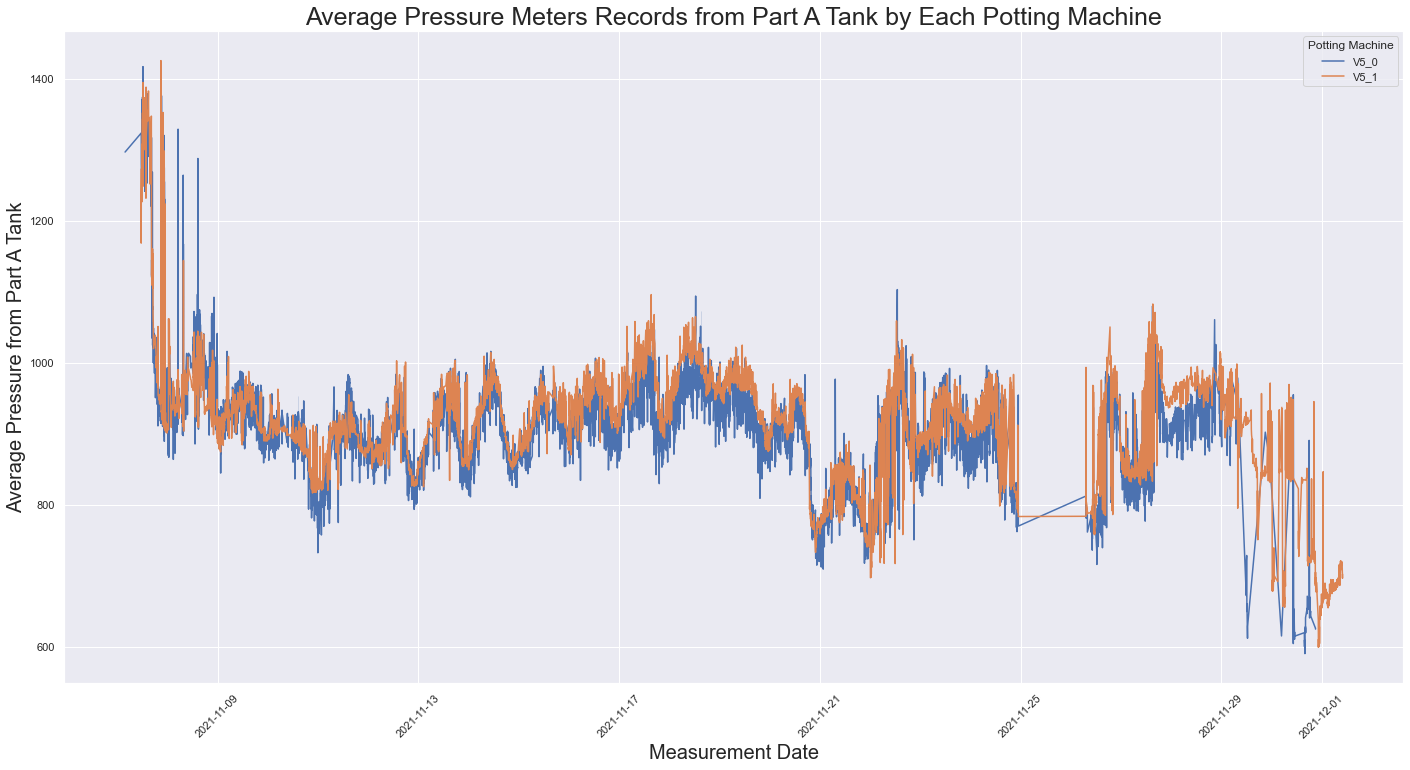

In [ ]:
sns.set(rc={'figure.figsize':(24,12)})
sns.lineplot(x ='measurement_time_pst', y = 'Part A Pressure - Avg', data = df_thickness, hue='Potting Machine')
plt.xticks(rotation=45, )
plt.xlabel("Measurement Date", fontsize=20)
plt.ylabel("Average Pressure from Part A Tank", fontsize=20)
plt.title("Average Pressure Meters Records from Part A Tank by Each Potting Machine", fontsize=25)
plt.show()
#sns.lineplot(data = df_thickness['Part B Pressure - Avg'])

**Points of Research from Above Visualization:**
1. From 2021-11-25 until about 2021-11-27, as problem statement mentioned, unexpected shift in thickness had occured. Above graph shows that Machine V5_0 underperformed at some level compared to the machine V5_1.
2. In Addtion, there is sudden rise of the pressure by machine V5_1 which causes thickness to rise additionally.
3. More Analysis to perform to confirm the output.

<b>Looking at the Part B Flow Pressure

(array([738103., 738107., 738111., 738115., 738119., 738123., 738125.]),
 <a list of 7 Text major ticklabel objects>)

Text(0.5, 0, 'Measurement Date')

Text(0, 0.5, 'Average Pressure from Part B Tank')

Text(0.5, 1.0, 'Average Pressure Meters Records from Part B Tank by Each Potting Machine')

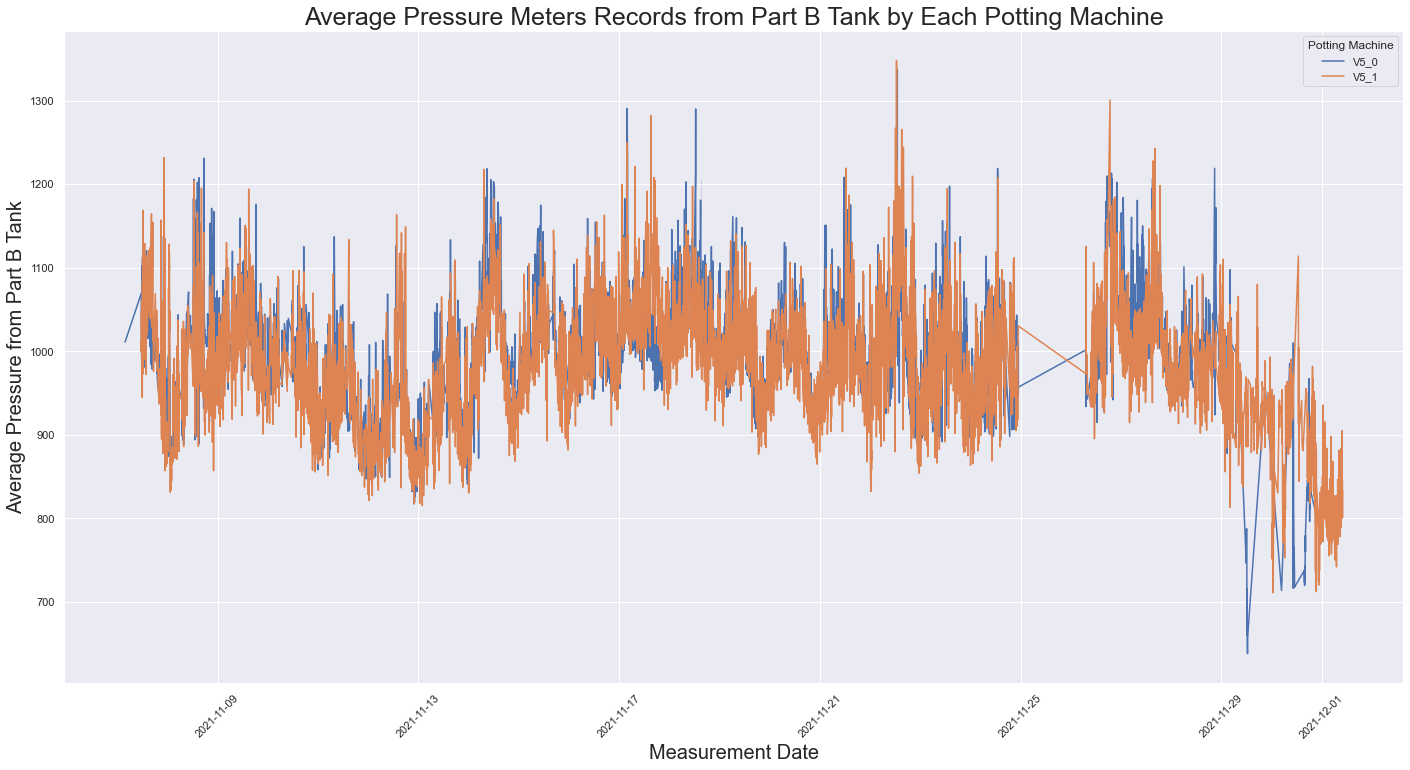

In [ ]:
sns.set(rc={'figure.figsize':(24,12)})
sns.lineplot(x ='measurement_time_pst', y = 'Part B Pressure - Avg', data = df_thickness, hue='Potting Machine')
plt.xticks(rotation=45)
plt.xlabel("Measurement Date", fontsize=20)
plt.ylabel("Average Pressure from Part B Tank", fontsize=20)
plt.title("Average Pressure Meters Records from Part B Tank by Each Potting Machine", fontsize=25)
plt.show()
#sns.lineplot(data = df_thickness['Part B Pressure - Avg'])

Notes:
- There is some level of uptick on the pressure, but it is not very significant to prove that it is the cause of rise in thickness. 
- Looking at more visualizations

<b>Looking at individually might lead to different results. I want to check if combined pressure of flow of Material from both of Tanks have caused any significant effect to the rise of thickness. I understand if there is high pressure of flow of material, thickness should rise as the volume of the material increases. Let's look visually!

(array([738103., 738107., 738111., 738115., 738119., 738123., 738125.]),
 <a list of 7 Text major ticklabel objects>)

Text(0.5, 0, 'Potting Date/Time')

Text(0, 0.5, 'Average Flow Rate from Part A and Part B')

Text(0.5, 1.0, 'Average Flow of Material from Part A and Part B Tank by Each Potting Machine')

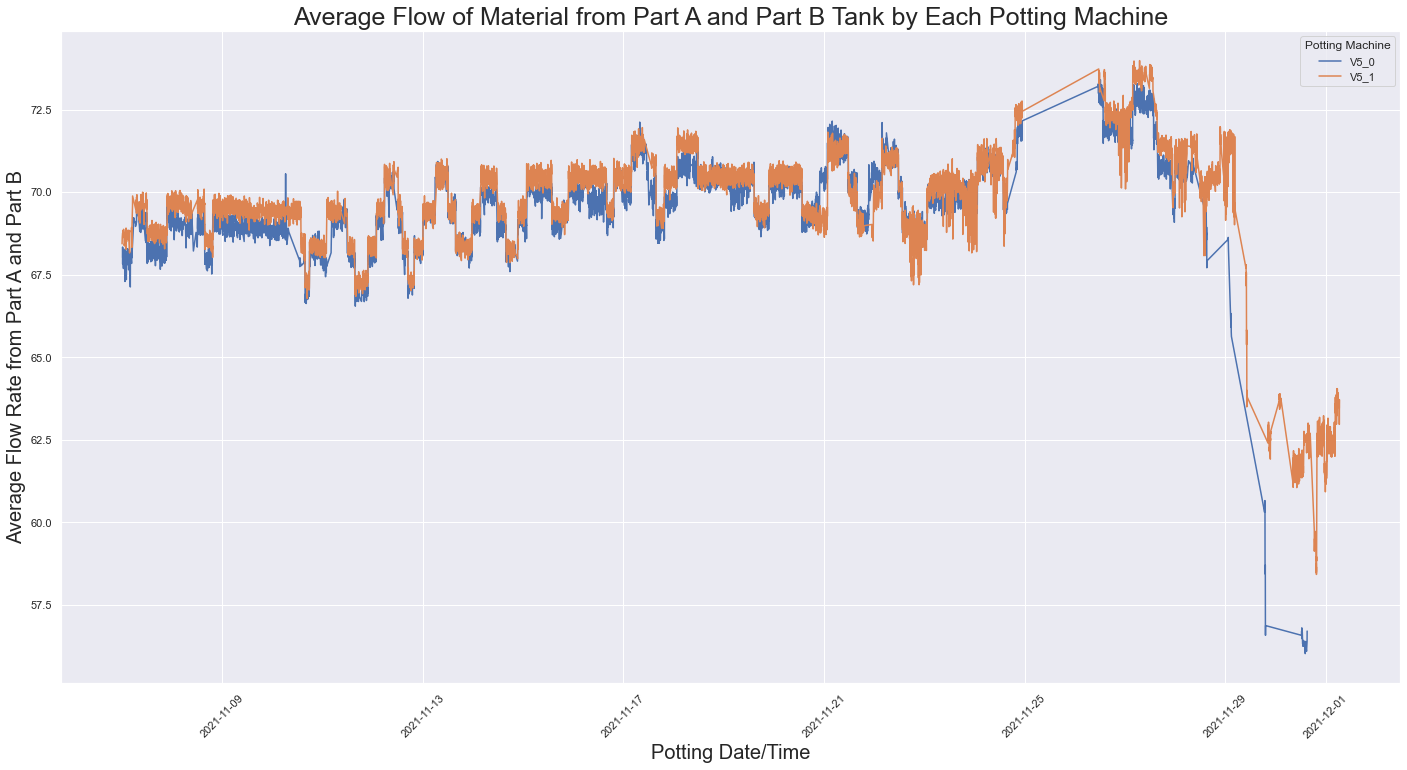

In [ ]:
sns.set(rc={'figure.figsize':(24,12)})
sns.lineplot(x ='potting_time_pst', y = 'Part A + Part B Flow Rate - Avg', data = df_thickness, hue='Potting Machine')
plt.xticks(rotation=45)
plt.xlabel("Potting Date/Time", fontsize=20)
plt.ylabel("Average Flow Rate from Part A and Part B", fontsize=20)
plt.title("Average Flow of Material from Part A and Part B Tank by Each Potting Machine", fontsize=25)
plt.show()

<b>Notes:<b>
- Historically, the material pressure flow from both the parts have been slighly up-and-down, but nearly in the same pace. 
- if we look at the pressure flow on 24th of 25th of November, and then at the time when the problem has occurred, nearly at 27, pressure flow was at highest level which definitely has cause more thickness of potting. 
- Machinery V5_1 seems to be the highest participant of it, but nearly equally V5_0 too.
- There is another quick thing catch, which would have prevented the failure or rise of thickness. Data shows that the problem started taking place from the date of 23 and 24th November. Pressure flow of material dropped and all of sudden started rising significantly. If noticed earlier, problem would have been prevented to occur.
- Exploring more opportunity to find the stronger reason of the failure.

<b>Only pressure might not be the core cause of the issue. We need to look at at what volume the material flow was mixed and dispensed. Looking at the visualization and trying to identify it:

(array([738103., 738107., 738111., 738115., 738119., 738123., 738125.]),
 <a list of 7 Text major ticklabel objects>)

Text(0.5, 0, 'Potting Date/Time')

Text(0, 0.5, 'Combined Volume of Materials from Part A & Part B')

Text(0.5, 1.0, 'Combined Volume of Materials from Part A and Part B Tank by Each Potting Machine')

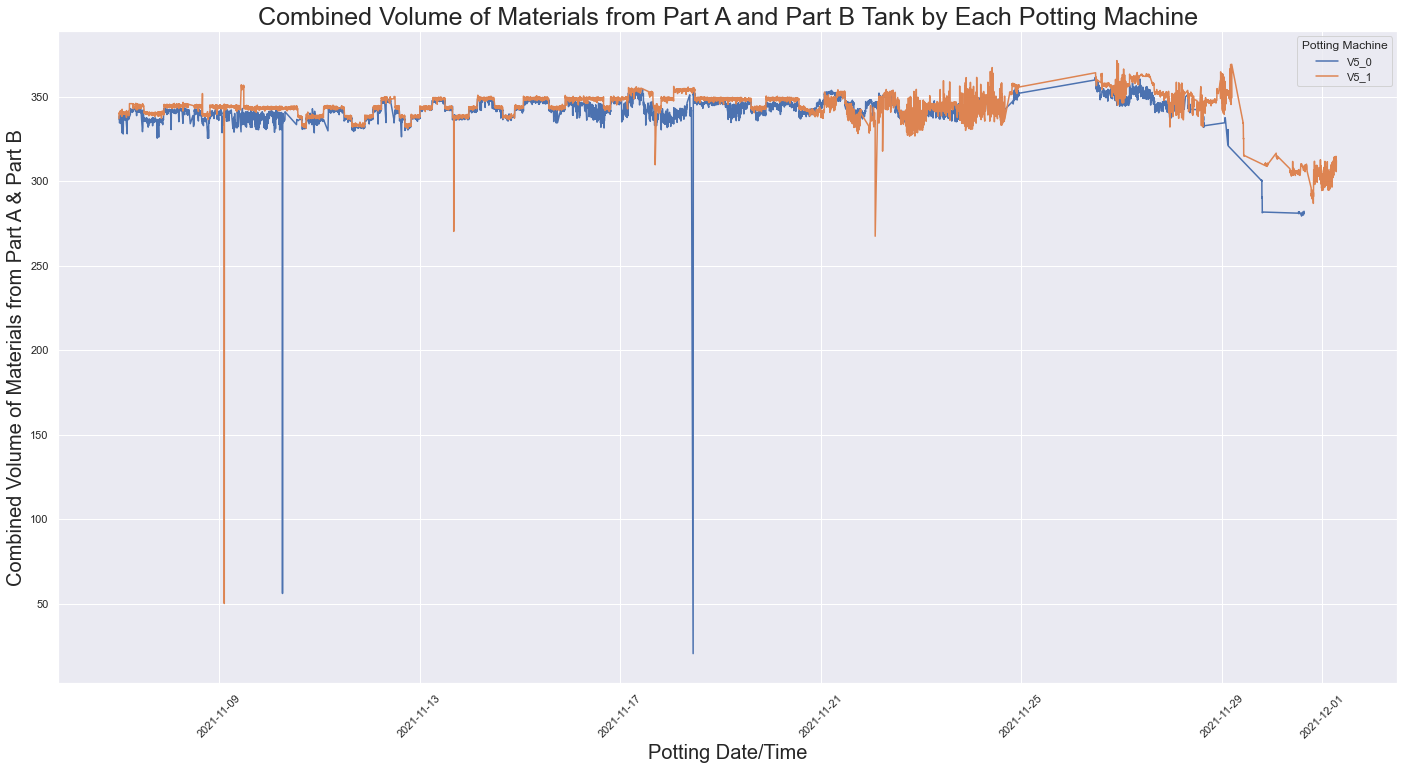

In [ ]:
sns.set(rc={'figure.figsize':(24,12)})
sns.lineplot(x ='potting_time_pst', y = 'Combined Volume Norm', data = df_thickness, hue='Potting Machine')
plt.xticks(rotation=45)
plt.xlabel("Potting Date/Time", fontsize=20)
plt.ylabel("Combined Volume of Materials from Part A & Part B", fontsize=20)
plt.title("Combined Volume of Materials from Part A and Part B Tank by Each Potting Machine", fontsize=25)
plt.show()

<b>Findings from the Above Visuals:<b>
- Concern is not just at the day of the problem has occured. It from about a week ago. If we look at the data from 11-22-2021, Part V5_1 has started flowing fluctuating volume of material which has travelled to the mixture and dispense to the part causing high thickness.
- There is a gap between the date of 25th and 27th. The volume which was passed from 23rd to 25th November, that has significant impact on the volume to the dispense of material causing thickness to rise.
- Even though volume fluctuation is not so high on 27th, but the actual volume is still higher to cause thickness to go up.

(array([738103., 738107., 738111., 738115., 738119., 738123., 738125.]),
 <a list of 7 Text major ticklabel objects>)

Text(0.5, 0, 'Dispense End Timestamp (Potting)')

Text(0, 0.5, 'Maximum Thickness Measurement')

Text(0.5, 1.0, 'Measure of Maximum Thickness at the end of each Dispense End Time')

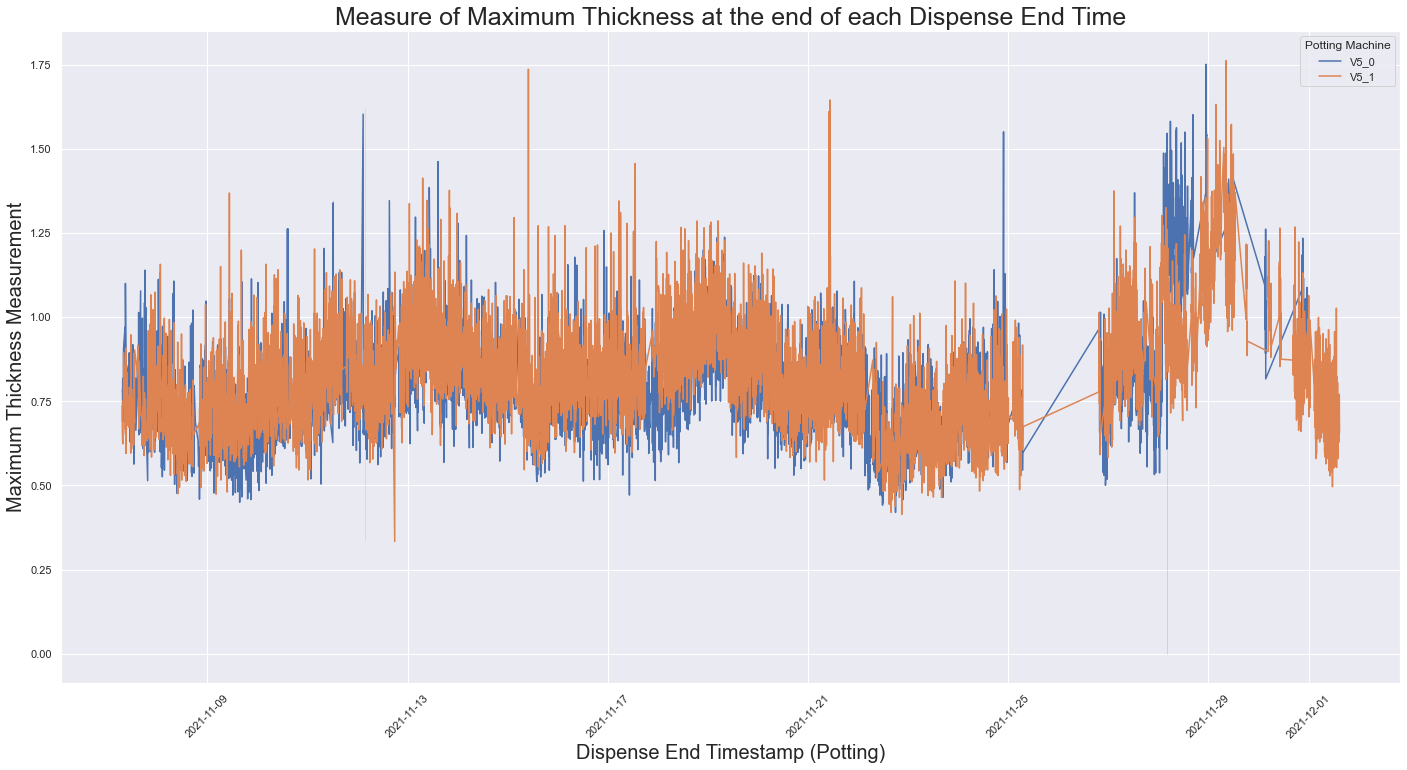

In [ ]:
sns.set(rc={'figure.figsize':(24,12)})
sns.lineplot(x ='Dispense End Timestamp (Potting)', y = 'Thickness Max Norm', data = df_thickness, hue='Potting Machine')
plt.xticks(rotation=45)
plt.xlabel("Dispense End Timestamp (Potting)", fontsize=20)
plt.ylabel("Maximum Thickness Measurement", fontsize=20)
plt.title("Measure of Maximum Thickness at the end of each Dispense End Time", fontsize=25)
plt.show()

<b>Looking at the Infrared Temperature if it has caused material to getting thick and stuck as initial shape without spreading enough

(array([738103., 738107., 738111., 738115., 738119., 738123., 738125.]),
 <a list of 7 Text major ticklabel objects>)

Text(0.5, 0, 'Potting DateTime')

Text(0, 0.5, 'Infrared Temperature Reading of Module at the Time of Potting')

Text(0.5, 1.0, 'Analysis of Infrared Temperature at the time of Potting')

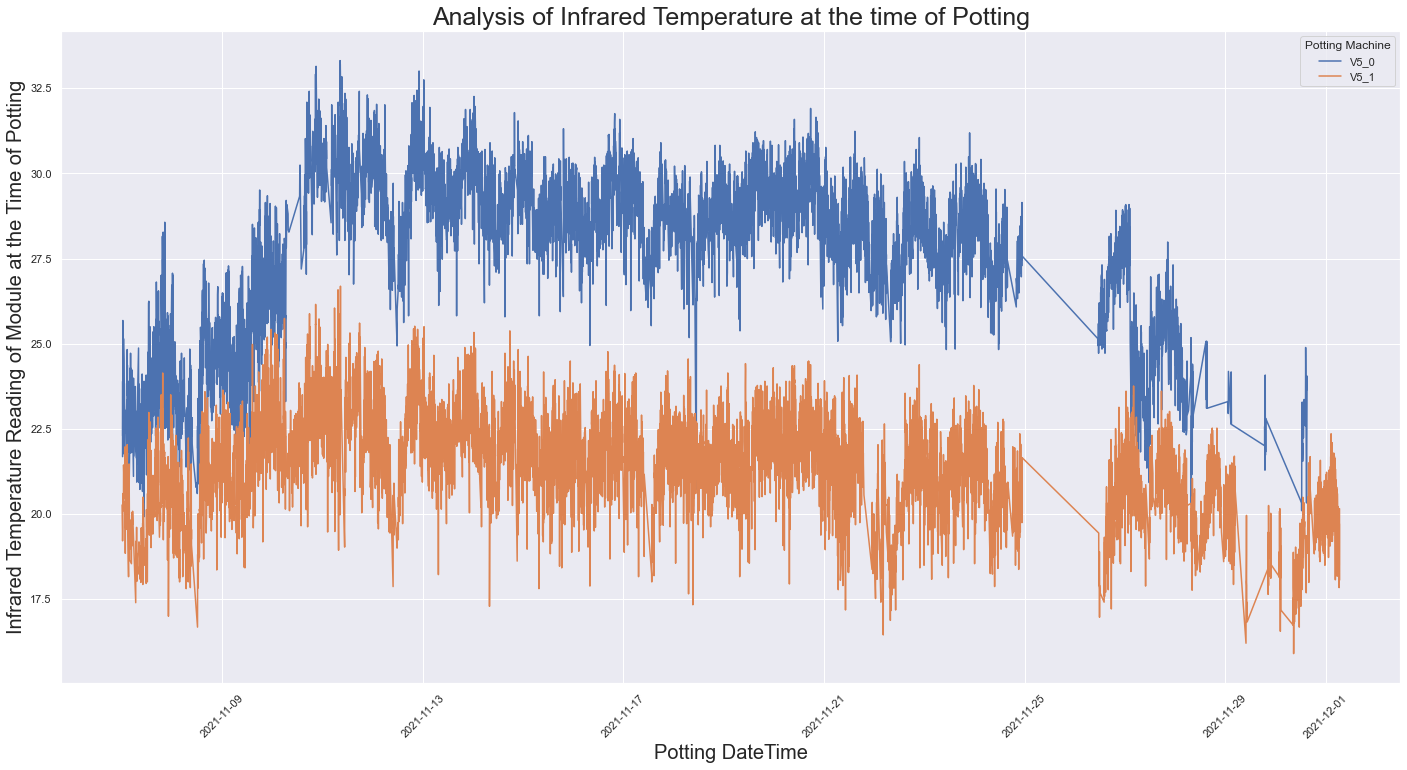

In [ ]:
sns.set(rc={'figure.figsize':(24,12)})
sns.lineplot(x ='potting_time_pst', y = 'IR module temp', data = df_thickness, hue='Potting Machine')
plt.xticks(rotation=45)
plt.xlabel("Potting DateTime", fontsize=20)
plt.ylabel("Infrared Temperature Reading of Module at the Time of Potting", fontsize=20)
plt.title("Analysis of Infrared Temperature at the time of Potting", fontsize=25)
plt.show()

**Key Findings**
- While analyzing the trend of the temperature, there is slight drop of temperature from 22nd November to 25th and then on 27th as continued at lower temperature which is one of the potential cause of the issue. 

(array([738103., 738107., 738111., 738115., 738119., 738123., 738125.]),
 <a list of 7 Text major ticklabel objects>)

Text(0.5, 0, 'Measurement Date and Time')

Text(0, 0.5, 'Average Potting Ratio for Part A and Part B')

Text(0.5, 1.0, 'Analyzing the Potting Ratio of Part A & B')

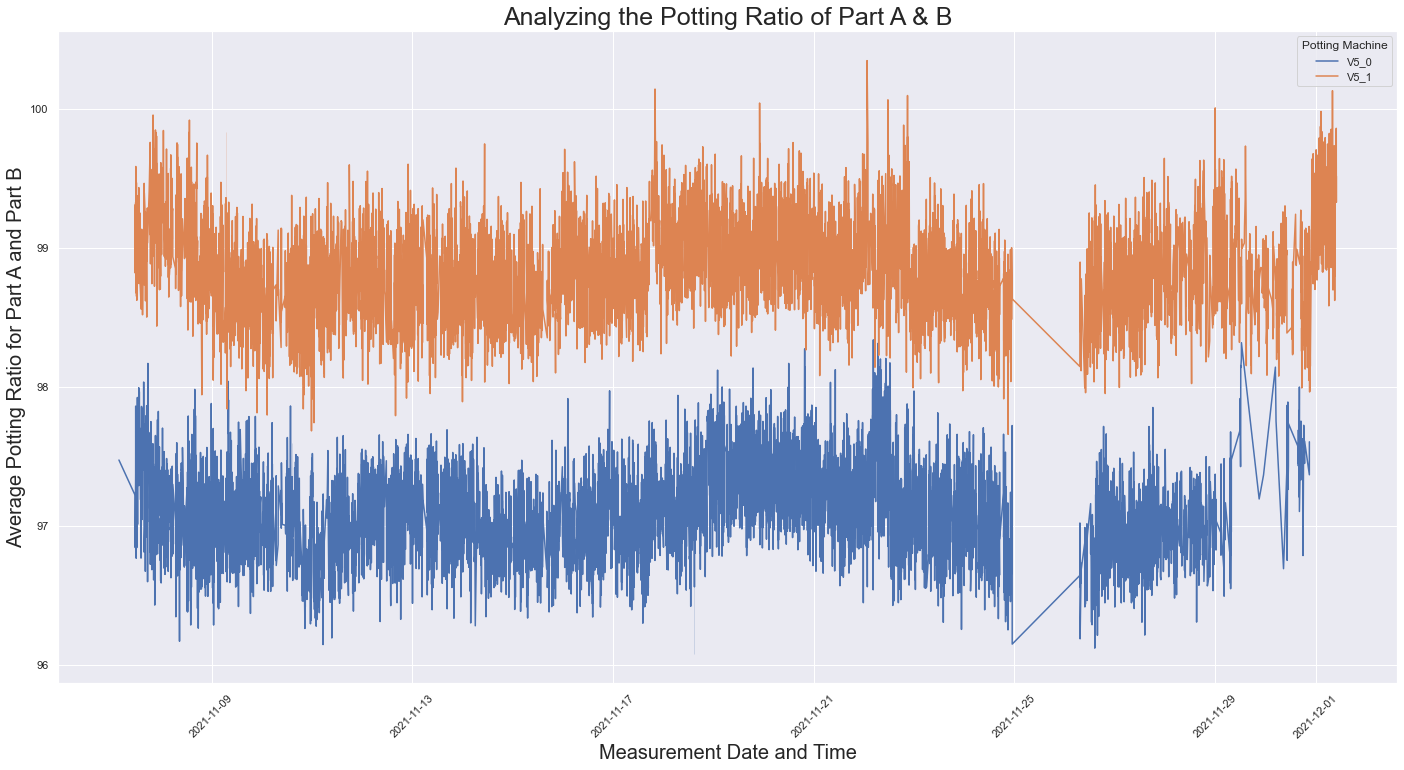

In [ ]:
sns.set(rc={'figure.figsize':(24,12)})
sns.lineplot(x ='measurement_time_pst', y = 'Potting Ratio (Part A/Part B) - Avg', data = df_thickness, hue='Potting Machine')
plt.xticks(rotation=45)
plt.xlabel("Measurement Date and Time", fontsize=20)
plt.ylabel("Average Potting Ratio for Part A and Part B", fontsize=20)
plt.title("Analyzing the Potting Ratio of Part A & B", fontsize=25)
plt.show()

<b>Checking if there Impact of Dispense Density at Measured Time

(array([738103., 738107., 738111., 738115., 738119., 738123., 738125.]),
 <a list of 7 Text major ticklabel objects>)

Text(0.5, 0, 'Measurement Time')

Text(0, 0.5, 'Dispense Density at Measured Time')

Text(0.5, 1.0, 'Measurement of Dispense Density at Each Point of Time')

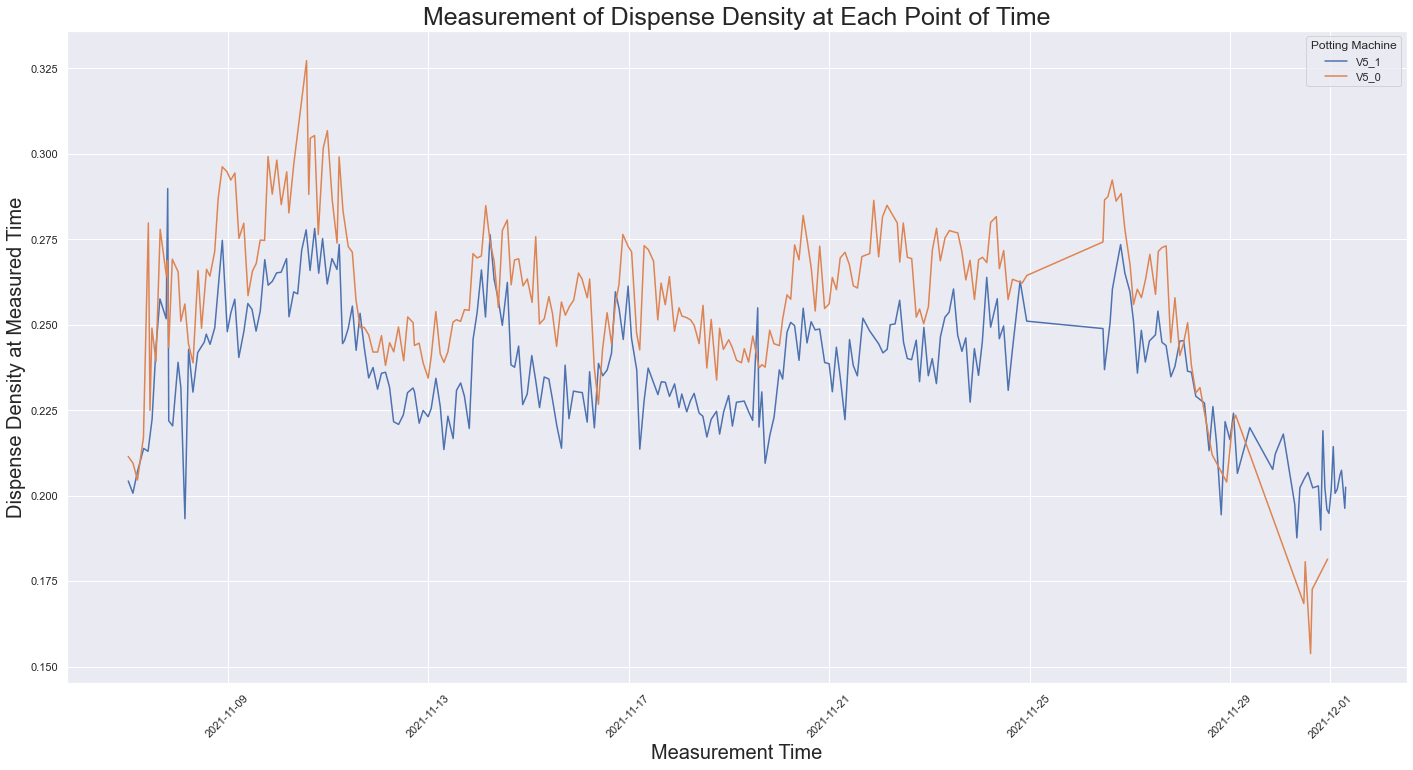

In [ ]:
sns.set(rc={'figure.figsize':(24,12)})
sns.lineplot(x ='Measurement Time', y = 'Density_Average', data = df_density, hue='Potting Machine')
plt.xticks(rotation=45)
plt.xlabel("Measurement Time", fontsize=20)
plt.ylabel("Dispense Density at Measured Time", fontsize=20)
plt.title("Measurement of Dispense Density at Each Point of Time", fontsize=25)
plt.show()

<b>Quick Findings:</b>
1. Dispense Density is slightly higher on 27th than usual Dispense that is one of the obvious reasons of higher thickness.
2. Dispense Density has started rising up from 19th November, and is consistently towards higher on density which might be one of the indicator which manufacturing team would like to be alerted to prevent such rise of dispense density in future.

<h3><b>Key Findings & Recommendations

1. Volume of materials passed from both (majorly from V5_1 Part Tank) from 21st November until 25th and even on 27th seems to be major concern of abnormal thickness (from Dispense Data)
2. There are other significant reasons of rise of thickness such as:<br>
    a. Drop on pressure of flow of material<br>
    b. Sudden rise of flow of material from 25th to 27th causing more material to go to mixture and dispense causing abundant material in potting<br>
    c. There is no strong significant proof to say that either V5_0 or V5_1 Part Tank is the issue, but from the density point of view, V5_1 seems to be the major player in the issue.<br>
    d. Drop of IR Temperature causing material to freeze early, before material could spread across the part. <br>
3. Monitoring the performance at the density of dispense would be the ideal way to prevent issues in future. If necessary stop machine as the volume of dispense is seen from a week ago.